<a href="https://colab.research.google.com/github/PreethiPara/CO-and-Nox-predictions-of-emissions/blob/main/Co_and_Nox_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## AT: Ambient Temperature


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [ ]:
df=pd.read_csv('/content/drive/My Drive/gt_2011.csv')
df.head()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,4.5878,1018.7,83.675,3.5758,23.979,1086.2,549.83,134.67,11.898,0.32663,81.952
1,4.2932,1018.3,84.235,3.5709,23.951,1086.1,550.05,134.67,11.892,0.44784,82.377
2,3.9045,1018.4,84.858,3.5828,23.990,1086.5,550.19,135.10,12.042,0.45144,83.776
3,3.7436,1018.3,85.434,3.5808,23.911,1086.5,550.17,135.03,11.990,0.23107,82.505
4,3.7516,1017.8,85.182,3.5781,23.917,1085.9,550.00,134.67,11.910,0.26747,82.028


In [ ]:
df.shape

(36733, 11)

In [ ]:
df.isnull().sum()

AT      0
AP      0
AH      0
AFDP    0
GTEP    0
TIT     0
TAT     0
TEY     0
CDP     0
CO      0
NOX     0
dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff144ee4f50>,
      dtype=object)

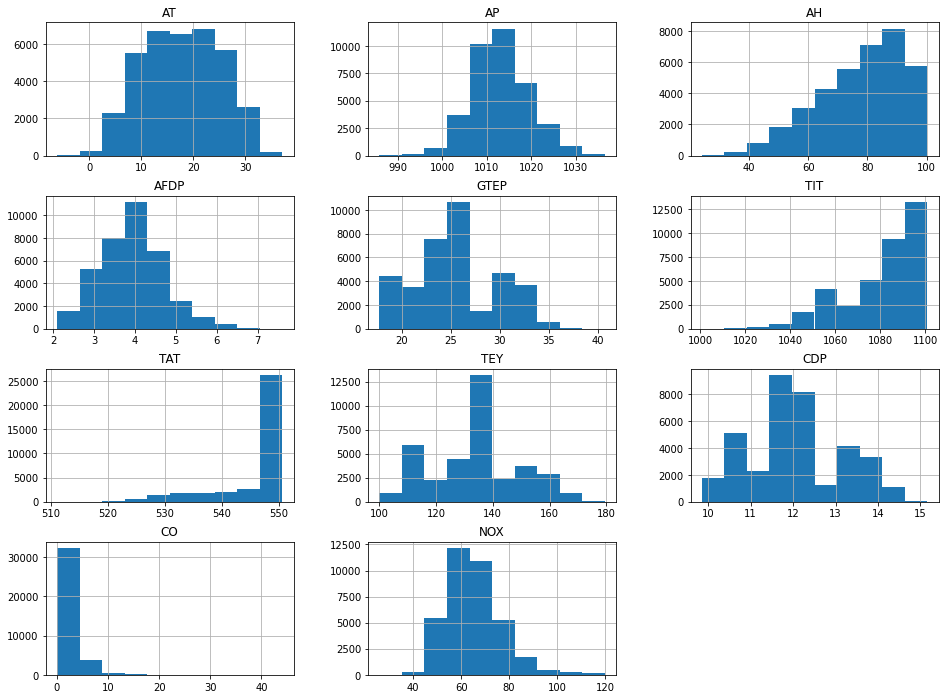

In [ ]:
df.hist(bins=10,figsize=(16,12))

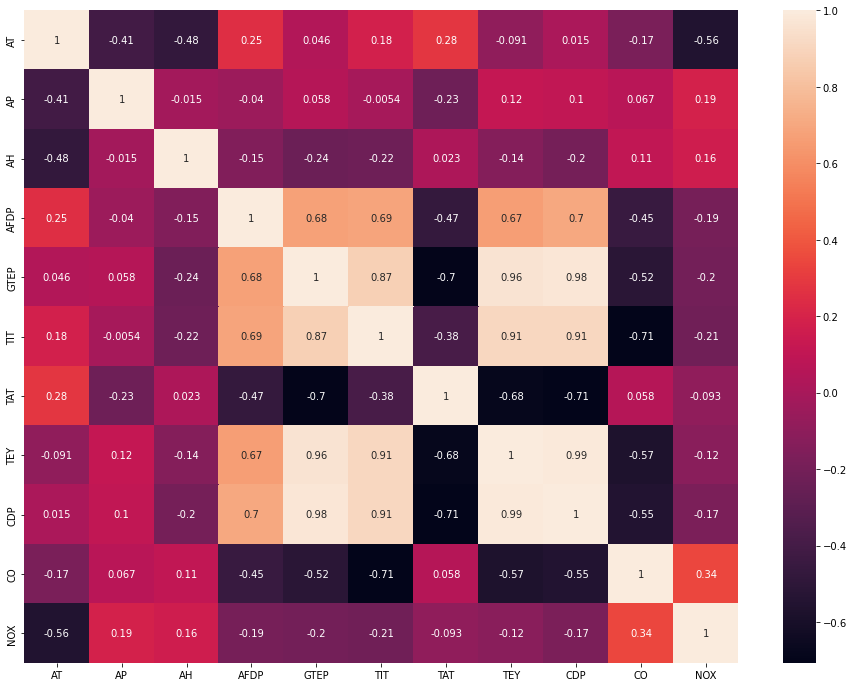

In [ ]:
plt.figure(figsize=(16,12))
sns.heatmap(df.corr(),annot=True)

In [ ]:
x=df.drop(['CO','NOX'],axis=1)
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=scaler.fit_transform(x)
y=df.drop(['AT','AP','AH','AFDP','GTEP','TIT','TAT','TEY','CDP'],axis=1)
print(x)
print(y)


[[-1.76236198  0.87105219  0.40162651 ...  0.53658863  0.07450154
  -0.14927265]
 [-1.80191968  0.8091639   0.44035094 ...  0.56874172  0.07450154
  -0.1547834 ]
 [-1.85411274  0.82463597  0.48343186 ...  0.58920277  0.10203313
  -0.01701458]
 ...
 [-1.64229242  2.38731536  1.19990283 ... -0.39146631 -1.64526249
  -1.46817947]
 [-1.58835377  2.4182595   1.12943821 ...  0.57751074 -0.13422633
  -0.26591691]
 [-1.56747386  2.43373158  1.15343352 ...  0.30274802 -0.51838807
  -0.54972068]]
             CO      NOX
0       0.32663   81.952
1       0.44784   82.377
2       0.45144   83.776
3       0.23107   82.505
4       0.26747   82.028
...         ...      ...
36728  10.99300   89.172
36729  11.14400   88.849
36730  11.41400   96.147
36731   3.31340   64.738
36732  11.98100  109.240

[36733 rows x 2 columns]


In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0,test_size=0.2)

In [ ]:
from sklearn import linear_model
reg=linear_model.LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

In [ ]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
pred=reg.predict(x_test)
print(pred)
acc=r2_score(y_test,pred)
a=100*acc
print(acc)

[[ 2.53984892 52.79026973]
 [ 3.78336238 69.57927784]
 [ 0.82857155 55.30079599]
 ...
 [ 1.67261155 68.49425634]
 [ 1.21967179 59.77585345]
 [ 1.05068641 52.64258099]]
0.5408844895099064


In [ ]:
input=(3.9045,	1018.4	,84.858,	3.5828,	23.990,	1086.5,	550.19,	135.10,	12.042)
input=np.asarray(input).reshape(1,-1)
input=scaler.transform(input)
print(input)
reg.predict(input)

[[-1.85411274  0.82463597  0.48343186 -0.44283062 -0.37508073  0.28922659
   0.58920277  0.10203313 -0.01701458]]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"


array([[ 1.83564794, 84.59004171]])

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
poly = PolynomialFeatures(degree = 4)
x_poly = poly.fit_transform(x_test)
poly.fit(x_poly, y_test)
lin2 = LinearRegression()
lin2.fit(x_poly, y_test)
pred=lin2.predict(poly.fit_transform(x_test))
print(pred)

[[ 1.91167251 49.03272008]
 [ 2.3140518  68.14315976]
 [ 1.61286756 52.29525565]
 ...
 [ 1.68926622 68.2708992 ]
 [ 1.71214569 67.39108875]
 [ 1.75215147 50.46550003]]


In [ ]:
lin1=LinearRegression()
x_po=poly.fit_transform(x_train)
lin1.fit(x_po,y_train)
x_pred=lin1.predict(poly.fit_transform(x_train))
acc=r2_score(y_train,x_pred)
print(acc)
acc=r2_score(y_test,pred)
b=100*acc
print(acc)

0.8319446003910114
0.8676952363353143


In [ ]:
import tensorflow as tf
ann=tf.keras.models.Sequential()
ann.add(tf.keras.layers.Dense(units=32, activation='relu'))
ann.add(tf.keras.layers.Dense(units = 32,activation='relu'))
ann.add(tf.keras.layers.Dense(units=2))

In [ ]:
ann.compile(optimizer='adam',loss='mean_squared_error',metrics=['mean_absolute_error'])

In [ ]:
ann.fit(x_train,y_train,batch_size=32,epochs=200)

Epoch 1/200
919/919 [==============================] - 1s 1ms/step - loss: 10.9669 - mean_absolute_error: 1.8866
Epoch 2/200
919/919 [==============================] - 1s 1ms/step - loss: 10.9020 - mean_absolute_error: 1.8773
Epoch 3/200
919/919 [==============================] - 1s 1ms/step - loss: 10.9564 - mean_absolute_error: 1.8809
Epoch 4/200
919/919 [==============================] - 1s 1ms/step - loss: 10.9735 - mean_absolute_error: 1.8782
Epoch 5/200
919/919 [==============================] - 1s 1ms/step - loss: 10.9653 - mean_absolute_error: 1.8779
Epoch 6/200
919/919 [==============================] - 1s 1ms/step - loss: 10.9063 - mean_absolute_error: 1.8771
Epoch 7/200
919/919 [==============================] - 1s 1ms/step - loss: 10.8764 - mean_absolute_error: 1.8717
Epoch 8/200
919/919 [==============================] - 1s 1ms/step - loss: 10.9153 - mean_absolute_error: 1.8740
Epoch 9/200
919/919 [==============================] - 1s 1ms/step - loss: 10.9226 - mean_absolu

In [ ]:
y_pred=ann.predict(x_test)
mse=mean_squared_error(y_test,y_pred)
print(f'MSE: {mse}')
print(f'RMSE: {np.sqrt(mse)}')
print(f'R_square: {r2_score(y_test,y_pred)}')
c=100*r2_score(y_test,y_pred)


MSE: 11.174946415532187
RMSE: 3.3428949154186984
R_square: 0.7638548129777634


In [ ]:
y_pred=ann.predict(x_test)
print(y_pred)

[[ 2.2482867 48.806236 ]
 [ 3.27566   67.6364   ]
 [ 2.4854298 58.444176 ]
 ...
 [ 1.1423942 67.52306  ]
 [ 1.2030288 65.46914  ]
 [ 1.6654245 51.418488 ]]


In [ ]:
pred=ann.predict(scaler.transform([[ 9.5,1015.7,82.518,4.61,32.218,1099.8,530.75,160.84,13.913 ]]))
print(pred)

[[ 1.1949164 66.50924  ]]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"


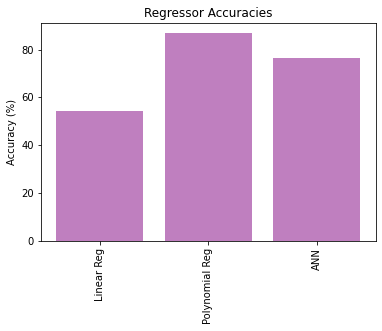

In [ ]:
predictors_group = ('Linear Reg', 'Polynomial Reg', 'ANN')
x_pos = np.arange(len(predictors_group))
accuracies1 = [a, b, c]
    
plt.bar(x_pos, accuracies1, align='center', alpha=0.5, color='purple')
plt.xticks(x_pos, predictors_group, rotation='vertical')
plt.ylabel('Accuracy (%)')
plt.title('Regressor Accuracies')
plt.show()